# Installation de SQL

In [ ]:
# prompt: installer sqlite

!pip install pysqlite3
import sqlite3
sqlite3.version


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pysqlite3: filename=pysqlite3-0.5.4-cp310-cp310-linux_x86_64.whl size=151317 sha256=dd98614cb8724dd16ae3d0fb1b01c4456df1ac140ab6e0b38c6b0c91043d947b
  Stored in directory: /root/.cache/pip/wheels/04/55/74/e3b53aeb9ff9e933626ee3938ccad69123828115ae34ce028e
Successfully built pysqlite3


'2.6.0'

In [ ]:
# Importer les bibliothèques nécessaires
import sqlite3
import pandas as pd

# Créer une connexion SQLite en mémoire (ou sur un fichier si besoin)
conn = sqlite3.connect("ecommerce.db")  # Remplacez "ecommerce.db" par ":memory:" pour une base temporaire
cursor = conn.cursor()

print("Connexion à la base de données SQLite établie.")


Connexion à la base de données SQLite établie.


# Inserssion de la bases de données

In [ ]:
# Charger le fichier CSV dans un DataFrame pandas
file_path = "/content/E-commerce Dataset (1).csv"  # Remplacez par le chemin du fichier si différent
df = pd.read_csv(file_path)

# Aperçu des données
print("Aperçu des données :")
print(df.head())

# Nettoyage des données (si nécessaire)
df = df.fillna("")  # Remplacer les valeurs nulles par des chaînes vides


Aperçu des données :
   Order_Date      Time  Aging  Customer_Id  Gender Device_Type  \
0  2018-01-02  10:56:33    8.0        37077  Female         Web   
1  2018-07-24  20:41:37    2.0        59173  Female         Web   
2  2018-11-08  08:38:49    8.0        41066  Female         Web   
3  2018-04-18  19:28:06    7.0        50741  Female         Web   
4  2018-08-13  21:18:39    9.0        53639  Female         Web   

  Customer_Login_type    Product_Category            Product  Sales  Quantity  \
0              Member  Auto & Accessories  Car Media Players  140.0       1.0   
1              Member  Auto & Accessories       Car Speakers  211.0       1.0   
2              Member  Auto & Accessories    Car Body Covers  117.0       5.0   
3              Member  Auto & Accessories    Car & Bike Care  118.0       1.0   
4              Member  Auto & Accessories               Tyre  250.0       1.0   

   Discount  Profit  Shipping_Cost Order_Priority Payment_method  
0       0.3    46.0   

# Création de la table et inserssion des données dans la table SQL

In [ ]:
# Ouvrir la connexion à la base de données
conn = sqlite3.connect('/content/ecommerce.db')  # Assurez-vous de spécifier le bon chemin de la base de données
cursor = conn.cursor()

# Définir le schéma SQL basé sur les colonnes du DataFrame
columns = df.columns
schema = ", ".join([f"{col} TEXT" for col in columns])  # Toutes les colonnes en TEXT pour simplifier

# Création de la table
table_name = "ecommerce_data"
cursor.execute(f"CREATE TABLE IF NOT EXISTS {table_name} ({schema});")
print(f"Table '{table_name}' créée avec succès.")

# Insérer les données dans la table SQL
df.to_sql(table_name, conn, if_exists="replace", index=False)
print("Données insérées dans la table SQL avec succès.")

# Fermer la connexion
conn.close()


Table 'ecommerce_data' créée avec succès.
Données insérées dans la table SQL avec succès.


# Lister les produits les plus vendus

In [ ]:
# Connexion à la base de données
conn = sqlite3.connect("ecommerce.db")
cursor = conn.cursor()


# Exécution de la requête
cursor.execute(query)
result = cursor.fetchall()

# Afficher les produits les plus vendus
print("Les produits les plus vendus :")
for row in result:
    print(f"Produit : {row[0]}, Nombre de ventes : {row[1]}")

# Fermer la connexion
conn.close()

Les produits les plus vendus :
Produit : T - Shirts, Nombre de ventes : 2332
Produit : Suits, Nombre de ventes : 2332
Produit : Shirts, Nombre de ventes : 2332
Produit : Jeans, Nombre de ventes : 2332
Produit : Fossil Watch, Nombre de ventes : 2332
Produit : Titak watch, Nombre de ventes : 2331
Produit : Sports Wear, Nombre de ventes : 2331
Produit : Sneakers, Nombre de ventes : 2331
Produit : Running Shoes, Nombre de ventes : 2331
Produit : Formal Shoes, Nombre de ventes : 2331


# Histogramme pour les catégories des produits

Index(['Product_Category', 'count'], dtype='object')
     Product_Category  count
0  Auto & Accessories   7505
1          Electronic   2701
2             Fashion  25646
3    Home & Furniture  15438


<ipython-input-125-8c917e8955ff>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Product_Category_data, x="Product_Category", y="count", palette="viridis")  # Assurez-vous d'utiliser le bon nom de colonne


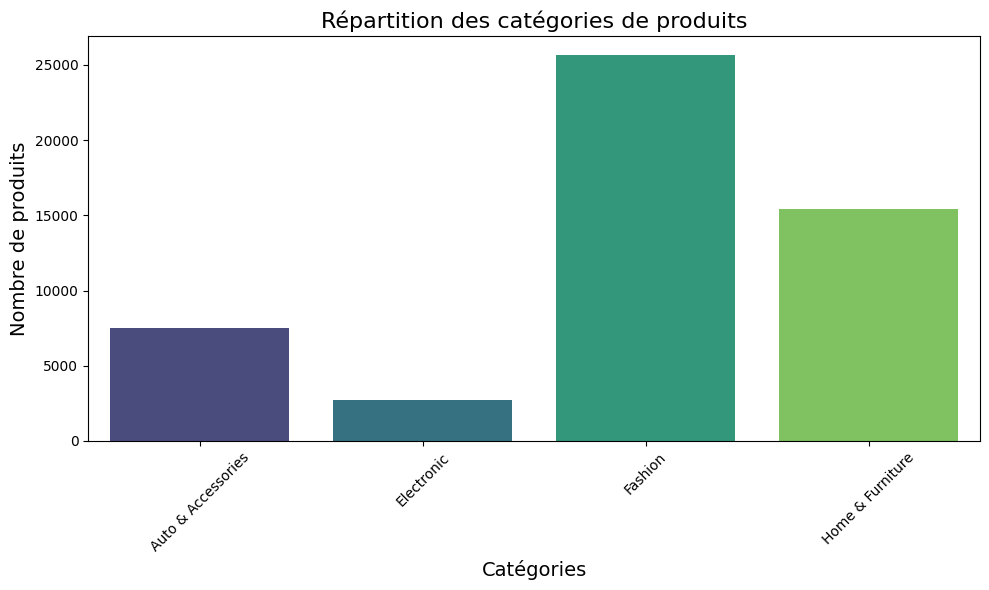

In [ ]:
# Ouvrir la connexion à la base de données
conn = sqlite3.connect('/content/ecommerce.db')  # Assurez-vous de spécifier le bon chemin de la base de données

# Nom de la table
table_name = 'ecommerce_data'

# Requête pour obtenir les données de la catégorie
query = f"SELECT product_category, COUNT(*) AS count FROM {table_name} GROUP BY product_category;"

# Exécuter la requête et récupérer les données
Product_Category_data = pd.read_sql_query(query, conn)

# Vérifier les colonnes et les premières lignes
print(Product_Category_data.columns)  # Vérifie les noms des colonnes
print(Product_Category_data.head())   # Affiche les premières lignes du DataFrame

# Tracer un histogramme
plt.figure(figsize=(10, 6))
sns.barplot(data=Product_Category_data, x="Product_Category", y="count", palette="viridis")  # Assurez-vous d'utiliser le bon nom de colonne
plt.title("Répartition des catégories de produits", fontsize=16)
plt.xlabel("Catégories", fontsize=14)
plt.ylabel("Nombre de produits", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Fermer la connexion
conn.close()


# Diagramme pour visualiser les produits les plus vendus

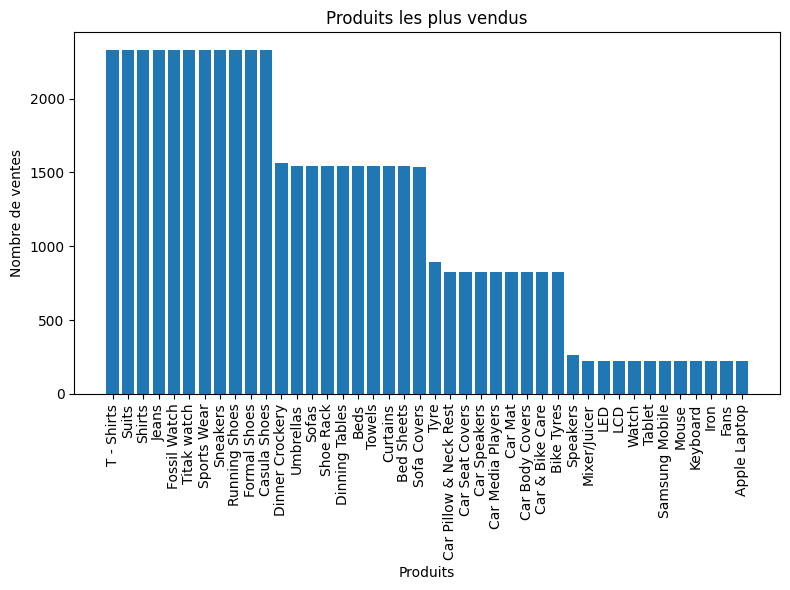

In [ ]:
import matplotlib.pyplot as plt

# Supposons que 'top_products' est une liste de tuples (produit, nombre de ventes)
# Obtenus à partir de la requête SQL précédente

products = [product for product, count in top_products]
counts = [count for product, count in top_products]

plt.figure(figsize=(8, 6))
plt.bar(products, counts)
plt.xlabel("Produits")
plt.ylabel("Nombre de ventes")
plt.title("Produits les plus vendus")
plt.xticks(rotation=90)  # Rotation des étiquettes de l'axe des x pour une meilleure lisibilité
plt.tight_layout()  # Ajustement automatique de la mise en page
plt.show()

# Diagramme circulaire des méthodes de paiements

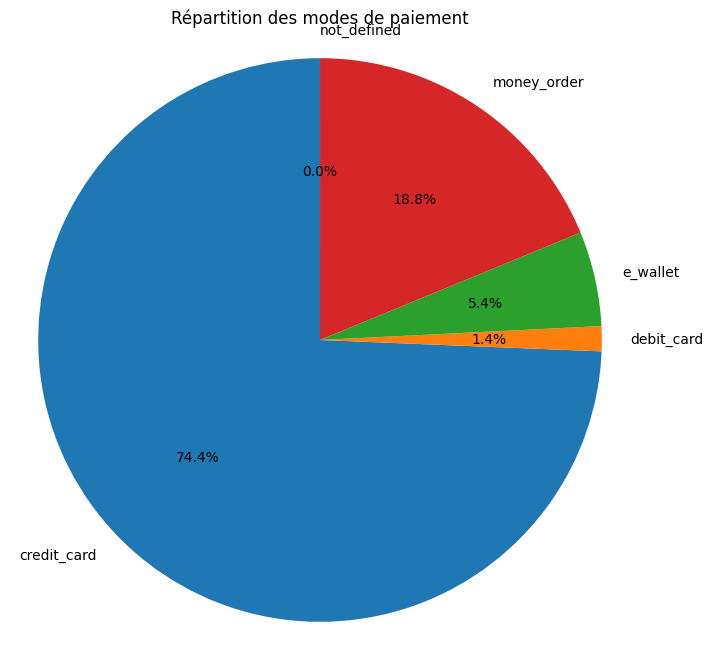

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connexion à la base de données (assurez-vous que 'ecommerce.db' existe)
conn = sqlite3.connect('ecommerce.db')
cursor = conn.cursor()

# Requête pour compter le nombre d'utilisation de chaque mode de paiement
query = "SELECT Payment_Method, COUNT(*) AS count FROM ecommerce_data GROUP BY Payment_Method"
df_payment_methods = pd.read_sql_query(query, conn)

# Fermeture de la connexion
conn.close()

# Création du diagramme circulaire
plt.figure(figsize=(8, 8))
plt.pie(df_payment_methods['count'], labels=df_payment_methods['Payment_method'], autopct='%1.1f%%', startangle=90)
plt.title('Répartition des modes de paiement')
plt.axis('equal')  # Pour assurer un cercle parfait
plt.show()

In [ ]:
# Connexion à la base de données
conn = sqlite3.connect('ecommerce.db')
cursor = conn.cursor()

# Vérifier les colonnes de la table 'ecommerce_data'
cursor.execute("PRAGMA table_info(ecommerce_data);")
columns = cursor.fetchall()

# Afficher les noms des colonnes
for column in columns:
    print(column)

# Fermeture de la connexion
conn.close()


(0, 'Order_Date', 'TEXT', 0, None, 0)
(1, 'Time', 'TEXT', 0, None, 0)
(2, 'Aging', 'TEXT', 0, None, 0)
(3, 'Customer_Id', 'INTEGER', 0, None, 0)
(4, 'Gender', 'TEXT', 0, None, 0)
(5, 'Device_Type', 'TEXT', 0, None, 0)
(6, 'Customer_Login_type', 'TEXT', 0, None, 0)
(7, 'Product_Category', 'TEXT', 0, None, 0)
(8, 'Product', 'TEXT', 0, None, 0)
(9, 'Sales', 'TEXT', 0, None, 0)
(10, 'Quantity', 'TEXT', 0, None, 0)
(11, 'Discount', 'TEXT', 0, None, 0)
(12, 'Profit', 'REAL', 0, None, 0)
(13, 'Shipping_Cost', 'TEXT', 0, None, 0)
(14, 'Order_Priority', 'TEXT', 0, None, 0)
(15, 'Payment_method', 'TEXT', 0, None, 0)


# Graphique d'évolution de ventes par mois

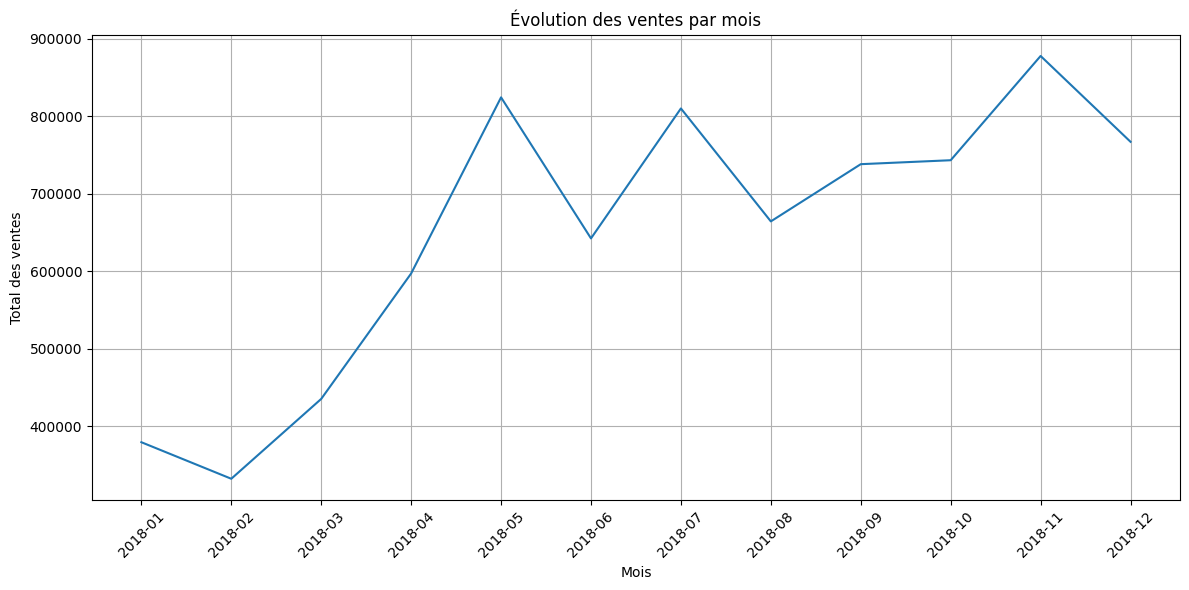

In [ ]:
# Connexion à la base de données
conn = sqlite3.connect('ecommerce.db')
cursor = conn.cursor()

# Requête SQL pour obtenir les ventes par mois en utilisant la colonne 'Sales'
query = """
SELECT
    strftime('%Y-%m', Order_Date) AS month,
    SUM(Sales) AS total_sales
FROM
    ecommerce_data
GROUP BY
    month
ORDER BY
    month;
"""
df_sales_by_month = pd.read_sql_query(query, conn)

# Fermeture de la connexion
conn.close()

# Création du graphique d'évolution des ventes par mois
plt.figure(figsize=(12, 6))
plt.plot(df_sales_by_month['month'], df_sales_by_month['total_sales'])
plt.xlabel('Mois')
plt.ylabel('Total des ventes')
plt.title('Évolution des ventes par mois')
plt.grid(True)
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe des x pour une meilleure lisibilité
plt.tight_layout()
plt.show()


# boxplot pour visualiser la distribution des montants des ventes

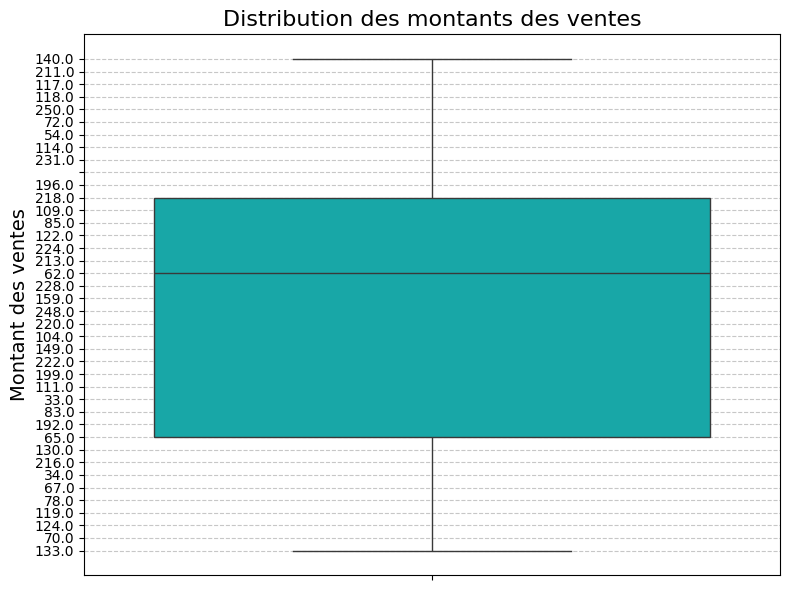

In [ ]:
# Connexion à la base de données
conn = sqlite3.connect('ecommerce.db')
cursor = conn.cursor()

# Requête SQL pour récupérer les montants des ventes (en utilisant la colonne 'Sales')
query = f"SELECT Sales FROM ecommerce_data;"  # Remplace 'ecommerce_data' par le vrai nom de ta table
order_prices = pd.read_sql_query(query, conn)

# Fermeture de la connexion
conn.close()

# Tracer un boxplot pour visualiser la distribution des montants des ventes
plt.figure(figsize=(8, 6))
sns.boxplot(data=order_prices, y="Sales", color="c")  # 'Sales' est la colonne pour les montants des ventes
plt.title("Distribution des montants des ventes", fontsize=16)
plt.ylabel("Montant des ventes", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


# Nuage de points pour visualiser la relation entre Customer_Id et TotalSpent

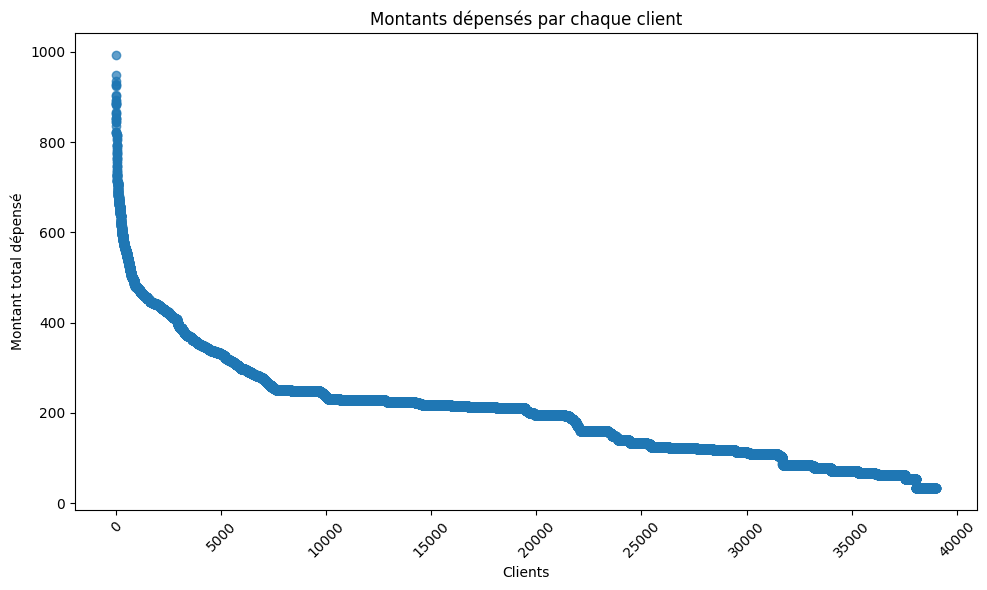

        Customer_Id    TotalSpent
count  38997.000000  38996.000000
mean   57249.786676    200.364422
std    26085.364876    116.618870
min    10000.000000     33.000000
25%    34784.000000    117.000000
50%    59330.000000    207.000000
75%    79894.000000    245.000000
max    99999.000000    994.000000
   Customer_Id  TotalSpent
0        87989       994.0
1        35324       949.0
2        79016       935.0
3        10436       929.0
4        51093       927.0
5        16997       925.0
6        80884       904.0
7        97843       903.0
8        95831       894.0
9        37805       890.0


In [ ]:
# Connexion à la base de données
conn = sqlite3.connect('ecommerce.db')

# Requête pour obtenir les montants dépensés par chaque client
query = """
SELECT Customer_Id, SUM(Sales) AS TotalSpent
FROM ecommerce_data
GROUP BY Customer_Id
ORDER BY TotalSpent DESC;
"""

# Exécution de la requête SQL et récupération des résultats
customer_data = pd.read_sql_query(query, conn)

# Fermeture de la connexion
conn.close()

# Nuage de points pour visualiser la relation entre Customer_Id et TotalSpent
plt.figure(figsize=(10, 6))
plt.scatter(customer_data.index, customer_data['TotalSpent'], alpha=0.7)
plt.xlabel('Clients')
plt.ylabel('Montant total dépensé')
plt.title('Montants dépensés par chaque client')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analyse des montants dépensés par chaque client (valeurs agrégées)
print(customer_data.describe())  # Statistiques descriptives
print(customer_data.sort_values('TotalSpent', ascending=False).head(10)) # Top 10 des clients qui dépensent le plus


# Top 10 des produits les plus vendus

<ipython-input-17-4b078a7e0739>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["T - Shirts", "Suits", "Shirts", "Jeans", "Fossil Watch",


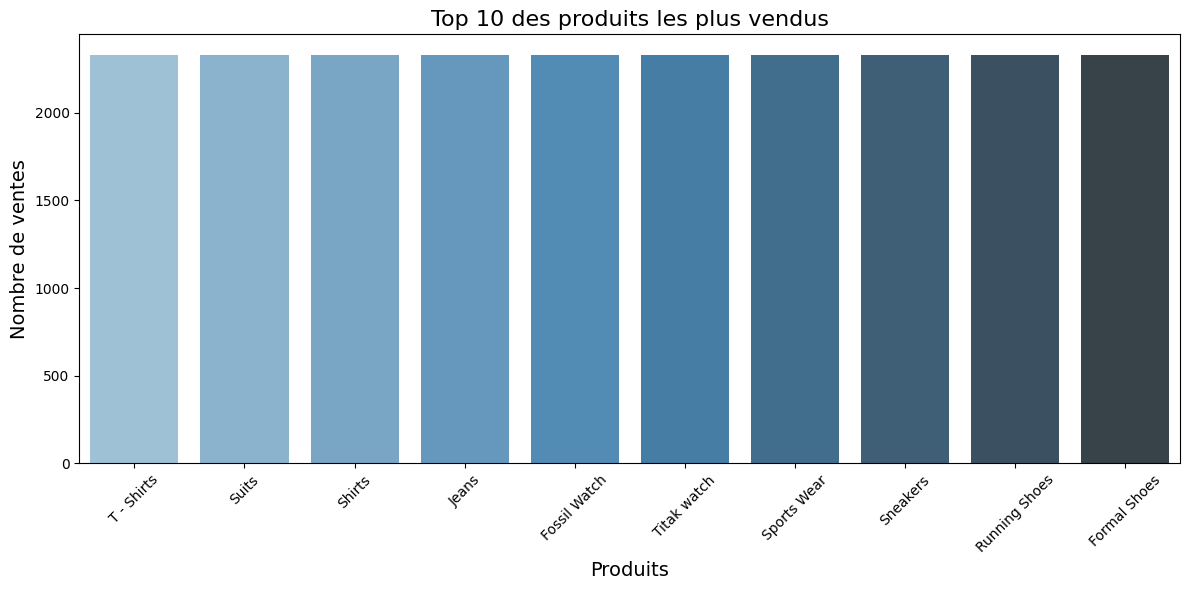

In [ ]:
# Exemple : Barplot
plt.figure(figsize=(12, 6))
sns.barplot(x=["T - Shirts", "Suits", "Shirts", "Jeans", "Fossil Watch",
               "Titak watch", "Sports Wear", "Sneakers", "Running Shoes", "Formal Shoes"],
            y=[2332, 2332, 2332, 2332, 2332, 2331, 2331, 2331, 2331, 2331], palette="Blues_d")
plt.title("Top 10 des produits les plus vendus", fontsize=16)
plt.xlabel("Produits", fontsize=14)
plt.ylabel("Nombre de ventes", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Répartition des clients par genre (Pie Chart)

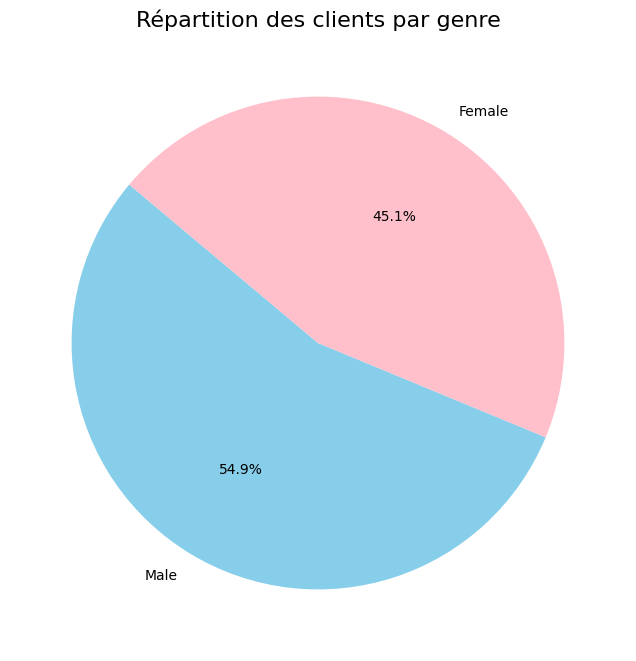

In [ ]:
# Exemple : Répartition par genre
gender_data = df['Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_data, labels=gender_data.index, autopct="%1.1f%%", colors=["skyblue", "pink"], startangle=140)
plt.title("Répartition des clients par genre", fontsize=16)
plt.show()


# Impact des remises sur le profit (Scatter Plot)

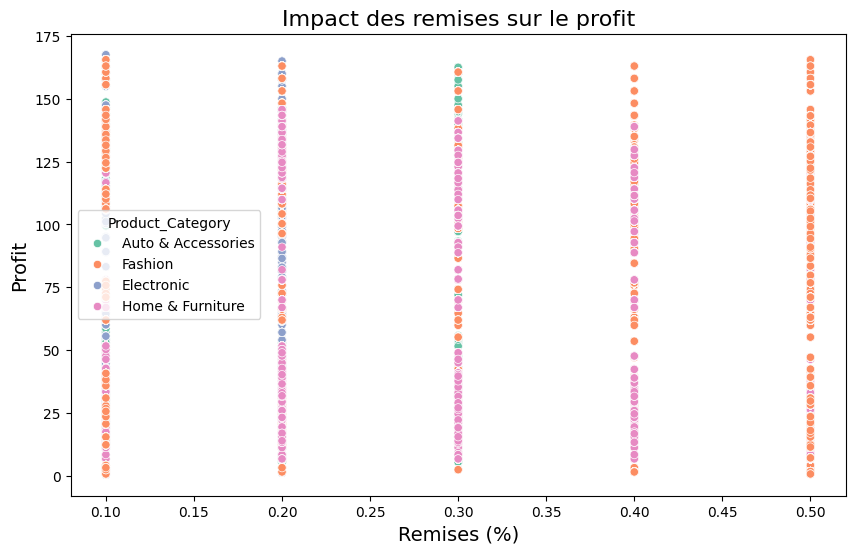

In [ ]:
# Exemple : Impact des remises sur les profits
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Discount", y="Profit", hue="Product_Category", palette="Set2")
plt.title("Impact des remises sur le profit", fontsize=16)
plt.xlabel("Remises (%)", fontsize=14)
plt.ylabel("Profit", fontsize=14)
plt.show()


# Répartition des commandes par priorité (Barplot ou Pie Chart)

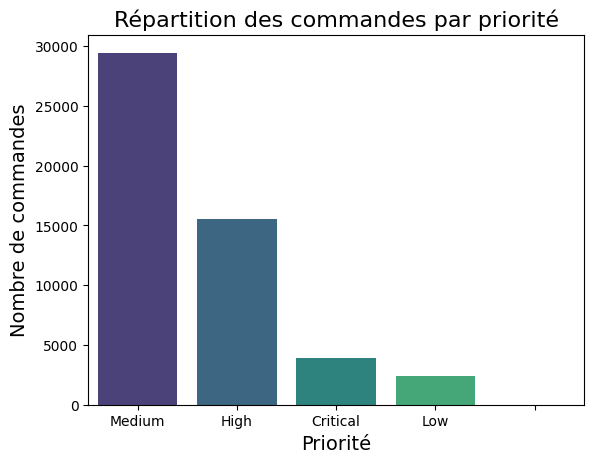

In [ ]:
# Exemple : Barplot des priorités de commande
priority_data = df['Order_Priority'].value_counts()
sns.barplot(x=priority_data.index, y=priority_data.values, palette="viridis")
plt.title("Répartition des commandes par priorité", fontsize=16)
plt.xlabel("Priorité", fontsize=14)
plt.ylabel("Nombre de commandes", fontsize=14)
plt.show()


# Analyse des ventes par catégorie de produit

<ipython-input-31-ddb6abf18256>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Category_sales, x="Product_Category", y="Sales", palette="coolwarm")


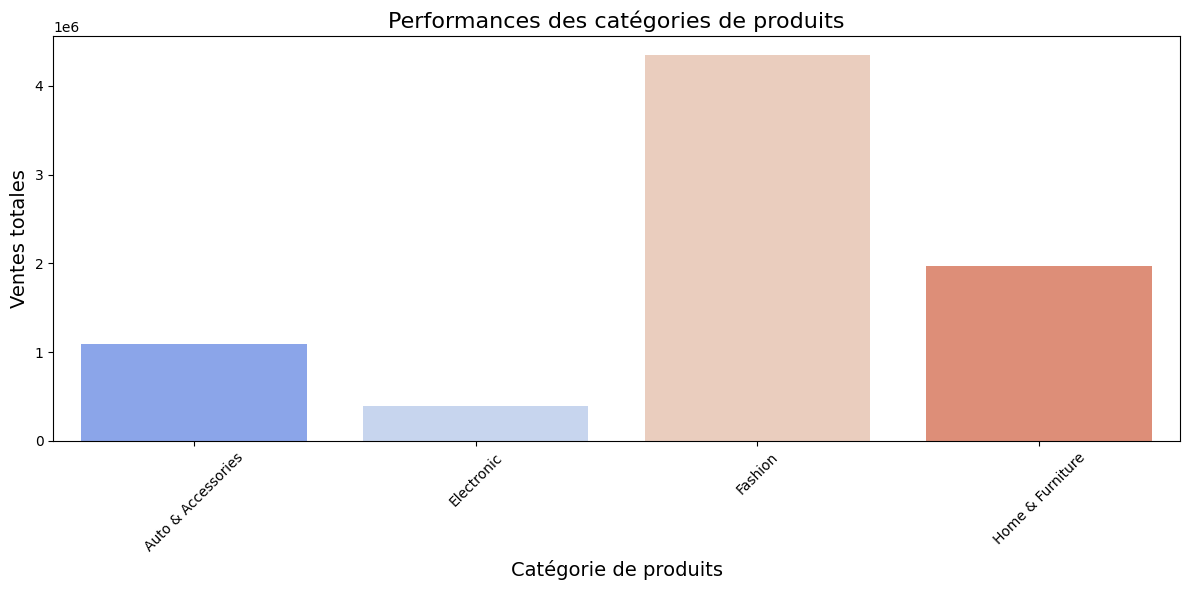

In [ ]:
# Graphique à barres pour les performances des catégories
plt.figure(figsize=(12, 6))
sns.barplot(data=Category_sales, x="Product_Category", y="Sales", palette="coolwarm")
plt.title("Performances des catégories de produits", fontsize=16)
plt.xlabel("Catégorie de produits", fontsize=14)
plt.ylabel("Ventes totales", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Évolution des ventes par date (Line Chart)

<ipython-input-33-46559b41dad4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order_Date'] = pd.to_datetime(df['Order_Date'])  # Assurez-vous que c'est au format datetime


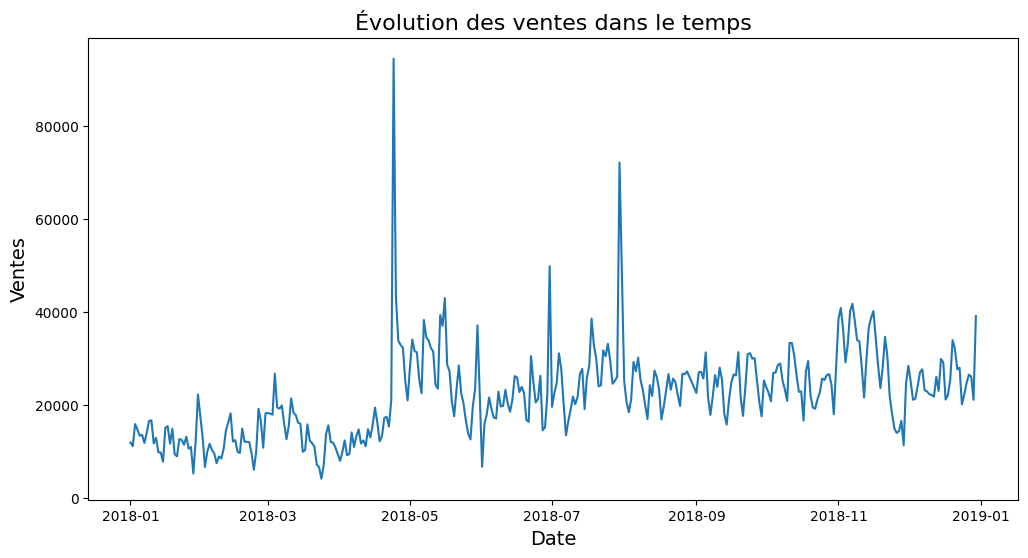

In [ ]:
# Exemple : Évolution des ventes
df['Order_Date'] = pd.to_datetime(df['Order_Date'])  # Assurez-vous que c'est au format datetime
sales_over_time = df.groupby("Order_Date")["Sales"].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_over_time, x="Order_Date", y="Sales")
plt.title("Évolution des ventes dans le temps", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Ventes", fontsize=14)
plt.show()


# Comparaison des types de clients (Barplot ou Boxplot)

<ipython-input-24-8af402c898ea>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Customer_Login_type", y="Sales", palette="coolwarm")


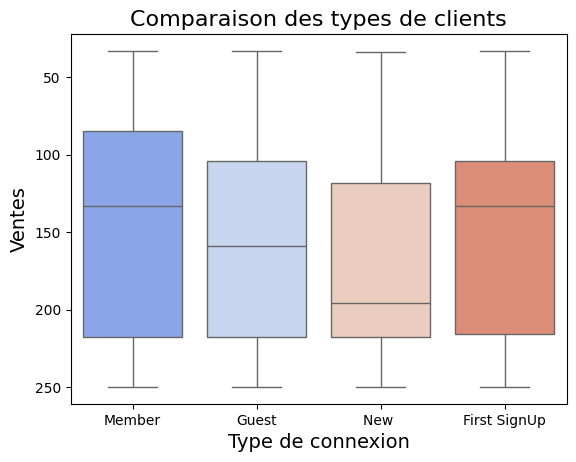

In [ ]:
# Exemple : Comparaison des types de clients
sns.boxplot(data=df, x="Customer_Login_type", y="Sales", palette="coolwarm")
plt.title("Comparaison des types de clients", fontsize=16)
plt.xlabel("Type de connexion", fontsize=14)
plt.ylabel("Ventes", fontsize=14)
plt.show()
